<font color=gray>__Author__ : Ferhat Can ATAMAN <br>
__Task__   : DataBoss Cv Task<br>
__email__: ataman.ferhatcan@gmail.com</font>

## <font color=red>Part 0. How to use this project?</font>

1. Download outputs zip file from __[here](https://1drv.ms/f/s!AqjEO7llf4dQzAPSKuCyXDjtckkP)__ and extract root project folder. There should be 3 folder their names __"outputs_lr_0.1", "outputs_lr_0.01" and "outputs_lr_0.001"__ It contains pretrained models for different configuration.<br>
2. Download basic_requirements.(requirements.txt is my working enviroment package list)<br><br>

- There are 3 pyton source file is used in this task.<br>
    - <font color=blue>cifar_DataCreate.py:</font> it reads cifar10 batches and generate train, validation and test datasets.
    - <font color=blue>Dataset.py:</font>: it is used for Dataloader. It holds data Ids and labels.
    - <font color=blue>transfer_learning.py:</font> it is used for train and test network with desired settings. 

## <font color=red>Part 1. Theoritical Part</font>

- Input size = 227x227x3 <br>
- Number of Filters = 96 <br>
- Kernel Size = 11x11 <br>
- Stride = 4 <br>

$ outputsize = (inputsize + padding*2 - kernelsize) / stride  + 1 $

1. Padding = 0 <br>
    
   $ outputsize = (227 - 11) / 4 + 1 = 55 $ <br>
    output = 55x55x96 <br><br>
    
2. Padding = 3 <br>

   $ outputsize = (227 + 3*2 -11) / 4 + 1 = 56.5 $ <br>
   It means that with this padding convolution layer would not fit.<br>Thus, padding with 3 can not be used with above specifications. 

## <font color=red>Part 2. Image Classification Part</font>

### 1. Load Data <br>


train data shape:  (49000, 3072)
test data shape:  (10000, 3072)
val data shape:  (1000, 3072)

Random Samples from Training Dataset



<Figure size 576x576 with 0 Axes>

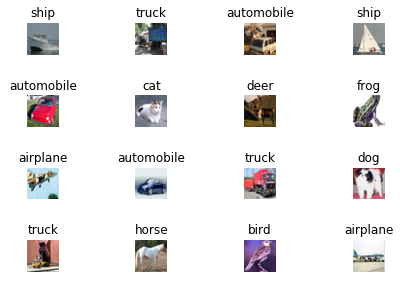

Random Samples from Validation Dataset



<Figure size 576x576 with 0 Axes>

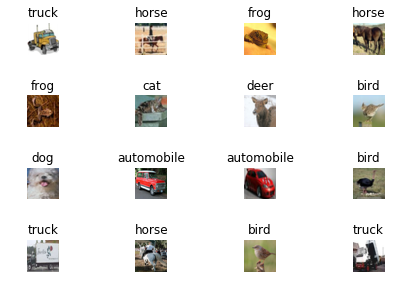

Random Samples from Test Dataset



<Figure size 576x576 with 0 Axes>

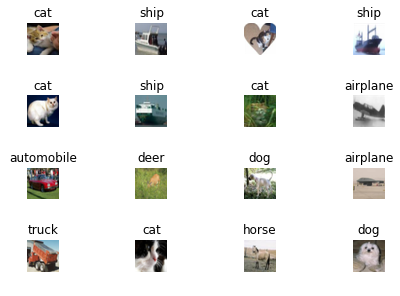

In [2]:
import cifar_DataCreate as cifar
# cifar_data_patch modified to show cifar batch folder 
# or download cifar python batches and copy to cifar-10-batches-py in the project

# it loads partitions(train, val, test) with labels and data
partition, labels, all_data, class_names = cifar.create_partition_labels()
# show 5 images for each partition

print('\nRandom Samples from Training Dataset\n')
cifar.imshow_batch(partition['train'], all_data, labels, 4, 4)
print('Random Samples from Validation Dataset\n')
cifar.imshow_batch(partition['val'], all_data, labels, 4, 4)
print('Random Samples from Test Dataset\n')
cifar.imshow_batch(partition['test'], all_data, labels, 4, 4)
    

### 2. Train & Test Network <br>

- <font color=blue>There are 3 options for transfer learning. All of them uses pretrained model as basis.</font>
    1. <font color=red>'whole'</font> : All weights in the initial model can be updated during training.
    2. <font color=red>'only_fc'</font>: Only fully connected can be updated during training.
    3. <font color=red>'fc+layer4'</font>: Fully connected layer and layer 4 of the resnet50 can be updated during training.<br><br>
    
- <font color=blue>There are 2 options for loss function.</font>
    1. <font color=red>'cross_entropy_loss'</font>
    2. <font color=red>'hinge_loss'</font><br><br>
    
- <font color=blue>Trainval options:</font>
    1. <font color=red>batch_size: </font> Initially equals to 25.
    2. <font color=red>size:</font> Percentages of images that is used for training. Validation uses (size*10) percentage for validation.
    3. <font color=red>num_epoch:</font> Initially equals to 25. <br><br>
    
- <font color=blue>Trainval function return path address of model saved and file name of the saved model.</font><br><br>

- <font color=blue>Test function takes path address and file name as input and gives test accuracy.</font><br><br>


In [1]:
# Example of train and test

from transfer_learning import resnet50_trainval as trainval
from transfer_learning import resnet50_test as test
# resnet50_trainval and resnet50_test 
# test type and loss function type should be determined.

# To show training results faster, number of images for training and testing can be 
# determined. size =1 means that 100% of all data is used. size=0.5 means that
# 50% of all data is used.

# In savepath, the results obtained are written txt files 
# Also, savename is the trained model that best validation accuracy obtained
savepath_whole_ccl, savename_whole_ccl \
        = trainval('whole', 'cross_entropy_loss', batch_size= 25, \
                               size=0.01, num_epoch = 1)

# To test saved model, just give savepath and savename of the model
# optinally test size can be given
test_acc_whole_ccl, test_acc_top2_whole_ccl \
        = test(savepath_whole_ccl, savename_whole_ccl, size=0.1)

savepath_only_fc_hl, savename_only_fc_hl \
        = trainval('only_fc', 'hinge_loss', \
                               size=0.01, num_epoch=1)

test_acc_only_fc_hl, test_acc_top2_only_fc_hl \
        = test(savepath_only_fc_hl, savename_only_fc_hl, size=0.1)

train data shape:  (49000, 3072)
test data shape:  (10000, 3072)
val data shape:  (1000, 3072)
*************************
Epoch 1/1

-------------------------
Image processed: 500/49000
Train Loss: 0.0229 
Train Acc: 0.1541 
Train Acc Top2: 0.2830
-------------------------


Image processed:100/1000
Validation Loss: 0.2086 
Validation Acc: 0.2233 
Validation Acc Top2: 0.4609
-------------------------


Training complete in 0m 9s
Best val Acc: 0.223320
-------------------------


Image processed:1000/10000
Test Acc: 0.2412 
Test Acc Top2: 0.4468

Testing completed in 0m 5s
Best Accuracy: 0.241249
-------------------------


*************************
Epoch 1/1

-------------------------
Image processed: 500/49000
Train Loss: 0.0085 
Train Acc: 0.1359 
Train Acc Top2: 0.2444
-------------------------


Image processed:100/1000
Validation Loss: 0.0635 
Validation Acc: 0.2754 
Validation Acc Top2: 0.4599
-------------------------


Training complete in 0m 4s
Best val Acc: 0.275397
----------

### 3. Choosing proper learning rate <br>

Choosing learning rate is very important for neural network processes. In transfer learning, pretrained network is used for weight initializer for similar but different datasets. Resnet50 was trained on ImageNet and I want to classify cifar10 dataset. The two datasets are in similar domain so, pretrained network can give good results. To choose correct learning rate, the cases ,that are fine tuning whole network and only training fully connected layer, are tested for 3 different learning rate. If the accuracy of the 'only_fc' becomes higher than the accuracy of 'whole', the learning rate is not suitable because loss function moves away from global minimum that is initial weights gives better results than trained weights. In below part, figure shows that Test accuracy vs learning rate for 1% of training set. For learning rate 0.001, 'whole' method accuracy becomes higher than 'only_fc'. Thus, 0.001 learning rate is suitable for training. <br><br>
For each loss type, below process should be repeated. My experiment showed that for hinge loss and cross entropy loss 0.01 and 0.001 learning rates are suitable respectively. For loss types, learning rates are different. They both have global minimum at same point but their functional behaivor is different. One can have more convex structure than others. 

Image processed:9975/10000
Test Acc: 0.1920 
Test Acc Top2: 0.3536

Testing completed in 0m 50s
Best Accuracy: 0.192000
-------------------------


Image processed:9975/10000
Test Acc: 0.7104 
Test Acc Top2: 0.8665

Testing completed in 0m 49s
Best Accuracy: 0.710400
-------------------------


Image processed:9975/10000
Test Acc: 0.8364 
Test Acc Top2: 0.9382

Testing completed in 0m 49s
Best Accuracy: 0.836400
-------------------------


Image processed:9975/10000
Test Acc: 0.7589 
Test Acc Top2: 0.8981

Testing completed in 0m 49s
Best Accuracy: 0.758900
-------------------------


Image processed:9975/10000
Test Acc: 0.7725 
Test Acc Top2: 0.9040

Testing completed in 0m 48s
Best Accuracy: 0.772500
-------------------------


Image processed:9975/10000
Test Acc: 0.7106 
Test Acc Top2: 0.8752

Testing completed in 0m 49s
Best Accuracy: 0.710600
-------------------------


Image processed:9975/10000
Test Acc: 0.7497 
Test Acc Top2: 0.8912

Testing completed in 0m 49s
Best Accuracy: 0

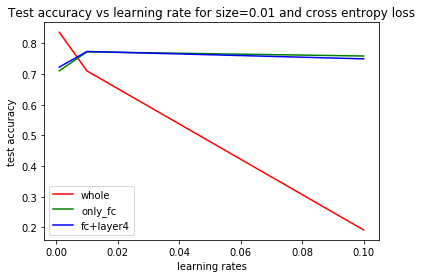

Image processed:9975/10000
Test Acc: 0.2459 
Test Acc Top2: 0.4625

Testing completed in 0m 48s
Best Accuracy: 0.245900
-------------------------


Image processed:9975/10000
Test Acc: 0.8735 
Test Acc Top2: 0.9586

Testing completed in 0m 49s
Best Accuracy: 0.873500
-------------------------


Image processed:9975/10000
Test Acc: 0.8268 
Test Acc Top2: 0.9390

Testing completed in 0m 49s
Best Accuracy: 0.826800
-------------------------


Image processed:9975/10000
Test Acc: 0.7512 
Test Acc Top2: 0.8960

Testing completed in 0m 48s
Best Accuracy: 0.751200
-------------------------


Image processed:9975/10000
Test Acc: 0.7527 
Test Acc Top2: 0.8957

Testing completed in 0m 48s
Best Accuracy: 0.752700
-------------------------


Image processed:9975/10000
Test Acc: 0.7055 
Test Acc Top2: 0.8698

Testing completed in 0m 49s
Best Accuracy: 0.705500
-------------------------


Image processed:9975/10000
Test Acc: 0.7543 
Test Acc Top2: 0.8934

Testing completed in 0m 49s
Best Accuracy: 0

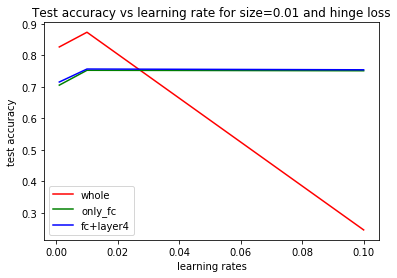

In [16]:
from transfer_learning import resnet50_test as test
import numpy as np
import matplotlib.pyplot as plt

savepath = 'outputs_lr_{}/{}_{}_trainval/size_{}/'
savename = "best_model_{}_epoch_{}_{}_result"

num_epoch = 15
size = 0.01
lr = [0.1, 0.01, 0.001]
train_type = ['whole', 'only_fc', 'fc+layer4']
loss_type = ['cross_entropy_loss', 'hinge_loss']

test_acc = np.zeros((3, 3))

for index, type in enumerate(train_type):
    for i in range(3):
        lrate = lr[i]
        path = savepath.format(lrate, type, loss_type[0], size)
        name = savename.format(num_epoch, type, loss_type[0])
        test_acc[index][i], _ \
            = test(path, name)

plt.plot( lr, test_acc[0], 'r', lr, test_acc[1], 'g', lr, test_acc[2], 'b')
plt.xlabel('learning rates')
plt.ylabel('test accuracy')
plt.title('Test accuracy vs learning rate for size=0.01 and cross entropy loss')
plt.legend(train_type)
plt.show()

for index, type in enumerate(train_type):
    for i in range(3):
        lrate = lr[i]
        path = savepath.format(lrate, type, loss_type[1], size)
        name = savename.format(num_epoch, type, loss_type[1])
        test_acc[index][i], _ \
            = test(path, name)

plt.plot( lr, test_acc[0], 'r', lr, test_acc[1], 'g', lr, test_acc[2], 'b')
plt.xlabel('learning rates')
plt.ylabel('test accuracy')
plt.title('Test accuracy vs learning rate for size=0.01 and hinge loss')
plt.legend(train_type)
plt.show()

### 4. Training  <br>

- <font color=blue>Trained for 3 different size of training data.</font>
    1. <font color=red>Whole training data: </font> 49000 images<br>
    2. <font color=red>10% of training data: </font> 4900 images<br>
    3. <font color=red>1% of training data: </font> 490 images<br><br>

It is expected that when the training data increases, overall prediction accuracy increases as well as loss decreases. As seen in below figures,
Best results achieved when whole training data is used. Furthermore, fine tuning of whole network gives better validation accuracy at each training data size. Both loss types give similar results for 3 different 
training data size. 

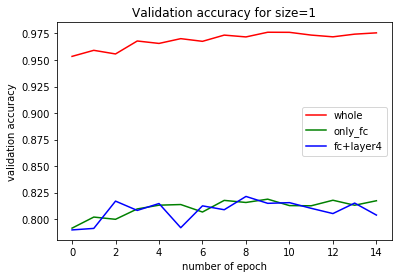

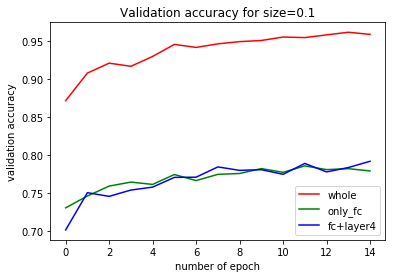

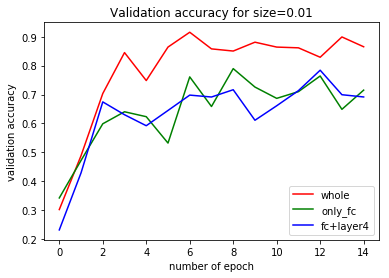

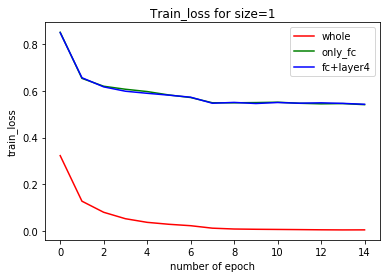

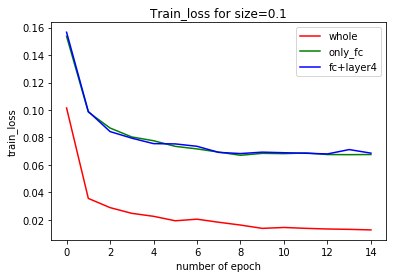

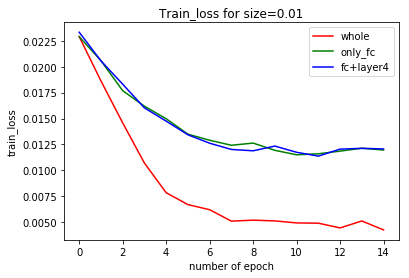

In [7]:
from transfer_learning import resnet50_test as test
import numpy as np
import matplotlib.pyplot as plt
import os

savepath = 'outputs_lr_{}/{}_{}_trainval/size_{}/'
savename = "Resized(224)_{}_epoch_result_{}_{}"

num_epoch = 15
size = [1, 0.1, 0.01]
lr = 0.001
train_type = ['whole', 'only_fc', 'fc+layer4']
loss_type = ['cross_entropy_loss', 'hinge_loss']
set_used = ['train', 'val']
measured = ['acc', 'loss']

train_loss = np.zeros((9, 15))
val_acc = np.zeros((9, 15))

# to use hinge loss loss_type in path variable should be changed to 1
for index, type in enumerate(train_type):
    for i in range(3):
        path = savepath.format(lr, type, loss_type[0], size[i])
        name = savename.format(num_epoch, set_used[1], measured[0])
        fullpath = os.path.join(path, name)
        temp = np.genfromtxt(fullpath, delimiter=',')
        val_acc[index * 3 + i] = temp
        name = savename.format(num_epoch, set_used[0], measured[1])
        fullpath = os.path.join(path, name)
        temp = np.genfromtxt(fullpath, delimiter=',')
        train_loss[index * 3 + i] = temp

x_list = range(15)
plt.plot(x_list, val_acc[0], 'r', x_list, val_acc[3], 'g', x_list, val_acc[6], 'b')
plt.xlabel('number of epoch')
plt.ylabel('validation accuracy')
plt.title('Validation accuracy for size=1')
plt.legend(train_type)
plt.show()

plt.plot(x_list, val_acc[1], 'r', x_list, val_acc[4], 'g', x_list, val_acc[7], 'b')
plt.xlabel('number of epoch')
plt.ylabel('validation accuracy')
plt.title('Validation accuracy for size=0.1')
plt.legend(train_type)
plt.show()

plt.plot(x_list, val_acc[2], 'r', x_list, val_acc[5], 'g', x_list, val_acc[8], 'b')
plt.xlabel('number of epoch')
plt.ylabel('validation accuracy')
plt.title('Validation accuracy for size=0.01')
plt.legend(train_type)
plt.show()

# ************************************************

plt.plot(x_list, train_loss[0], 'r', x_list, train_loss[3], 'g', x_list, train_loss[6], 'b')
plt.xlabel('number of epoch')
plt.ylabel('train_loss')
plt.title('Train_loss for size=1')
plt.legend(train_type)
plt.show()

plt.plot(x_list, train_loss[1], 'r', x_list, train_loss[4], 'g', x_list, train_loss[7], 'b')
plt.xlabel('number of epoch')
plt.ylabel('train_loss')
plt.title('Train_loss for size=0.1')
plt.legend(train_type)
plt.show()

plt.plot(x_list, train_loss[2], 'r', x_list, train_loss[5], 'g', x_list, train_loss[8], 'b')
plt.xlabel('number of epoch')
plt.ylabel('train_loss')
plt.title('Train_loss for size=0.01')
plt.legend(train_type)
plt.show()

### 5. Loss Types  <br>

- <font color=blue>Cross Entropy Loss: </font> It is based on probabilistic estimations. It tries to make minimum error rate classifier. It is suitable for classification tasks. <br>

- <font color=blue>Hinge Loss: </font> It is non parametric approach. It tries to find maximum margin between two classes. It is used to train svm classifiers. It can work better with small datasets. <br>

In [12]:
from transfer_learning import resnet50_test as test
import numpy as np
import matplotlib.pyplot as plt

savepath = 'outputs_lr_{}/{}_{}_trainval/size_{}/'
savename = "best_model_{}_epoch_{}_{}_result"

num_epoch = 15
size = [0.01]
lr = [0.001, 0.01] # cross entropy learning rate, hinge learning rate
train_type = 'whole'
loss_type = ['cross_entropy_loss', 'hinge_loss']

test_acc = np.zeros((2, 1))

for index, type in enumerate(loss_type):
    for i in range(1):
        path = savepath.format(lr[index], train_type, type, size[i])
        name = savename.format(num_epoch, train_type, type)
        test_acc[index][i], _ \
            = test(path, name)

# For smaller datasets, Hinge loss works better 
# because it tries to maximize margin

Image processed:9975/10000
Test Acc: 0.8364 
Test Acc Top2: 0.9382

Testing completed in 0m 47s
Best Accuracy: 0.836400
-------------------------


Image processed:9975/10000
Test Acc: 0.8735 
Test Acc Top2: 0.9586

Testing completed in 0m 48s
Best Accuracy: 0.873500
-------------------------




- <font color=green>Above result show that hinge loss gives better accuracy when the dataset is small because it tries to maximize margin of the classes. However, if dataset is big enough, cross entropy loss gives better results.</font>

Image processed:9975/10000
Test Acc: 0.8364 
Test Acc Top2: 0.9382

Testing completed in 0m 49s
Best Accuracy: 0.836400
-------------------------


Image processed:9975/10000
Test Acc: 0.9551 
Test Acc Top2: 0.9913

Testing completed in 0m 48s
Best Accuracy: 0.955100
-------------------------


Image processed:9975/10000
Test Acc: 0.9720 
Test Acc Top2: 0.9940

Testing completed in 0m 48s
Best Accuracy: 0.972000
-------------------------


Image processed:9975/10000
Test Acc: 0.8268 
Test Acc Top2: 0.9390

Testing completed in 0m 48s
Best Accuracy: 0.826800
-------------------------


Image processed:9975/10000
Test Acc: 0.9358 
Test Acc Top2: 0.9844

Testing completed in 0m 48s
Best Accuracy: 0.935800
-------------------------


Image processed:9975/10000
Test Acc: 0.9619 
Test Acc Top2: 0.9910

Testing completed in 0m 48s
Best Accuracy: 0.961900
-------------------------




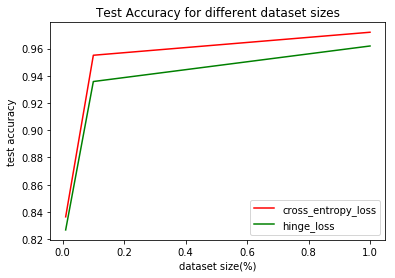

In [15]:
from transfer_learning import resnet50_test as test
import numpy as np
import matplotlib.pyplot as plt

savepath = 'outputs_lr_{}/{}_{}_trainval/size_{}/'
savename = "best_model_{}_epoch_{}_{}_result"

num_epoch = 15
size = [0.01, 0.1, 1]
lr = 0.001
train_type = 'whole'
loss_type = ['cross_entropy_loss', 'hinge_loss']

test_acc = np.zeros((2, 3))

for index, type in enumerate(loss_type):
    for i in range(3):
        path = savepath.format(lr, train_type, type, size[i])
        name = savename.format(num_epoch, train_type, type)
        test_acc[index][i], _ \
            = test(path, name)

plt.plot(size, test_acc[0], 'r', size, test_acc[1], 'g')
plt.xlabel('dataset size(%)')
plt.ylabel('test accuracy')
plt.title('Test Accuracy for different dataset sizes')
plt.legend(loss_type)
plt.show()

### 6. Conclusion  <br>

For neural networks, adjusting hyper parameters are vey important. Understanding effects of each parameter requires suitable tests. In this task, we focused on three points for transfer learning. Firstly, we tried to find learning rate for both loss function. Three fine tuning methods is used to decide learning rate. After finding suitable learning rate, the effect of dataset size is tested. Last point is that two loss function's accuracy results for three different dataset sizes are compared to find which one is suitable for which case. 